<a href="https://colab.research.google.com/github/garestrear/poligonal_clusterization/blob/master/Scaling_graphs_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalando las gráficas y clusterizando



In [259]:
#@title
# libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
matplotlib.rcParams.update({'font.size': 32})

In [260]:
#@title
lista = np.array([[0,-6,-7,-4,0],[0, 1, 0, -1, 0],[0, 0.5, 1, 0.5, 0],[0, -1, 0, 1,0],[0,2,7,1.5,0],[0,-10,-11,-8,0]])/10
x = np.linspace(0, 1, 5)

In [261]:
#lista

## Gráficas con datos originales

<function matplotlib.pyplot.show>

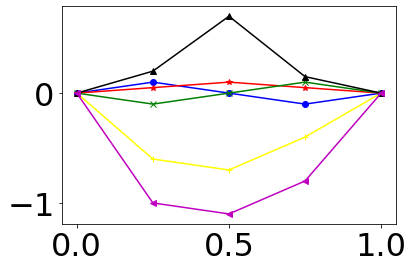

In [262]:
#@title
plt.plot(x, lista[0], '-+', color='yellow');
plt.plot(x, lista[1], '-o', color='blue');
plt.plot(x, lista[2], '-*', color='red');
plt.plot(x, lista[3], '-x', color='green');
plt.plot(x, lista[4], '-^', color='black');
plt.plot(x, lista[5], '-<', color='m');
plt.show

## Gráficas con escalamiento con respecto a la media

In [263]:
#@title
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
norm_lista = sc_X.fit_transform(lista)
print(norm_lista)

[[ 0.         -0.8684411  -0.91615733 -0.69395424  0.        ]
 [ 0.          0.75264895  0.28629917  0.19827264  0.        ]
 [ 0.          0.63685681  0.45807867  0.64438608  0.        ]
 [ 0.          0.28948037  0.28629917  0.79309056  0.        ]
 [ 0.          0.98423325  1.48875567  0.94179503  0.        ]
 [ 0.         -1.79477827 -1.60327534 -1.88359007  0.        ]]


(-0.05, 1.05, -2.0522073558762757, 1.6573729561252162)

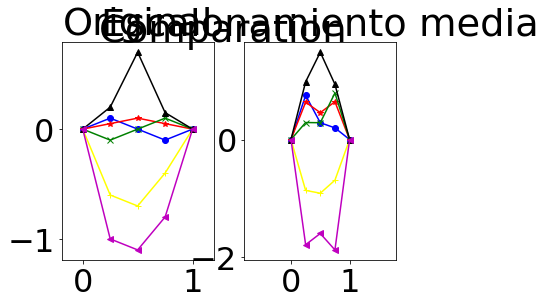

In [264]:
#@title
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation')
# La original
ax1.plot(x, lista[0], '-+', color='yellow');
ax1.plot(x, lista[1], '-o', color='blue');
ax1.plot(x, lista[2], '-*', color='red');
ax1.plot(x, lista[3], '-x', color='green');
ax1.plot(x, lista[4], '-^', color='black');
ax1.plot(x, lista[5], '-<', color='m');
ax1.set_title('Original')
ax1.axis('equal')
# scaled plot
ax2.plot(x, norm_lista[0], '-+', color='yellow');
ax2.plot(x, norm_lista[1], '-o', color='blue');
ax2.plot(x, norm_lista[2], '-*', color='red');
ax2.plot(x, norm_lista[3], '-x', color='green');
ax2.plot(x, norm_lista[4], '-^', color='black');
ax2.plot(x, norm_lista[5], '-<', color='m');
ax2.set_title('Escalonamiento media')
ax2.axis('equal')

## Gráficas con escalamiento Min Max

In [265]:
#@title
from sklearn.preprocessing import MinMaxScaler

mM_X = MinMaxScaler()
minMax_lista = mM_X.fit_transform(lista)

print(minMax_lista)

[[0.         0.33333333 0.22222222 0.42105263 0.        ]
 [0.         0.91666667 0.61111111 0.73684211 0.        ]
 [0.         0.875      0.66666667 0.89473684 0.        ]
 [0.         0.75       0.61111111 0.94736842 0.        ]
 [0.         1.         1.         1.         0.        ]
 [0.         0.         0.         0.         0.        ]]


(-0.05, 1.05, -0.05, 1.05)

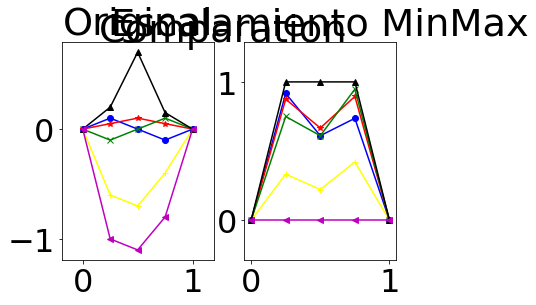

In [266]:
#@title
# Graficamos y comparamos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparation')
# La original
ax1.plot(x, lista[0], '-+', color='yellow');
ax1.plot(x, lista[1], '-o', color='blue');
ax1.plot(x, lista[2], '-*', color='red');
ax1.plot(x, lista[3], '-x', color='green');
ax1.plot(x, lista[4], '-^', color='black');
ax1.plot(x, lista[5], '-<', color='m');
ax1.set_title('Original')
ax1.axis('equal')

ax2.plot(x, minMax_lista[0], '-+', color='yellow');
ax2.plot(x, minMax_lista[1], '-o', color='blue');
ax2.plot(x, minMax_lista[2], '-*', color='red');
ax2.plot(x, minMax_lista[3], '-x', color='green');
ax2.plot(x, minMax_lista[4], '-^', color='black');
ax2.plot(x, minMax_lista[5], '-<', color='m');
ax2.set_title('Escalamiento MinMax')
ax2.axis('equal')

# Realizaremos Clusterización para estas 5 curvas. El proceso se hace para las curvas sin escalar y para las escaladas con el método de la media

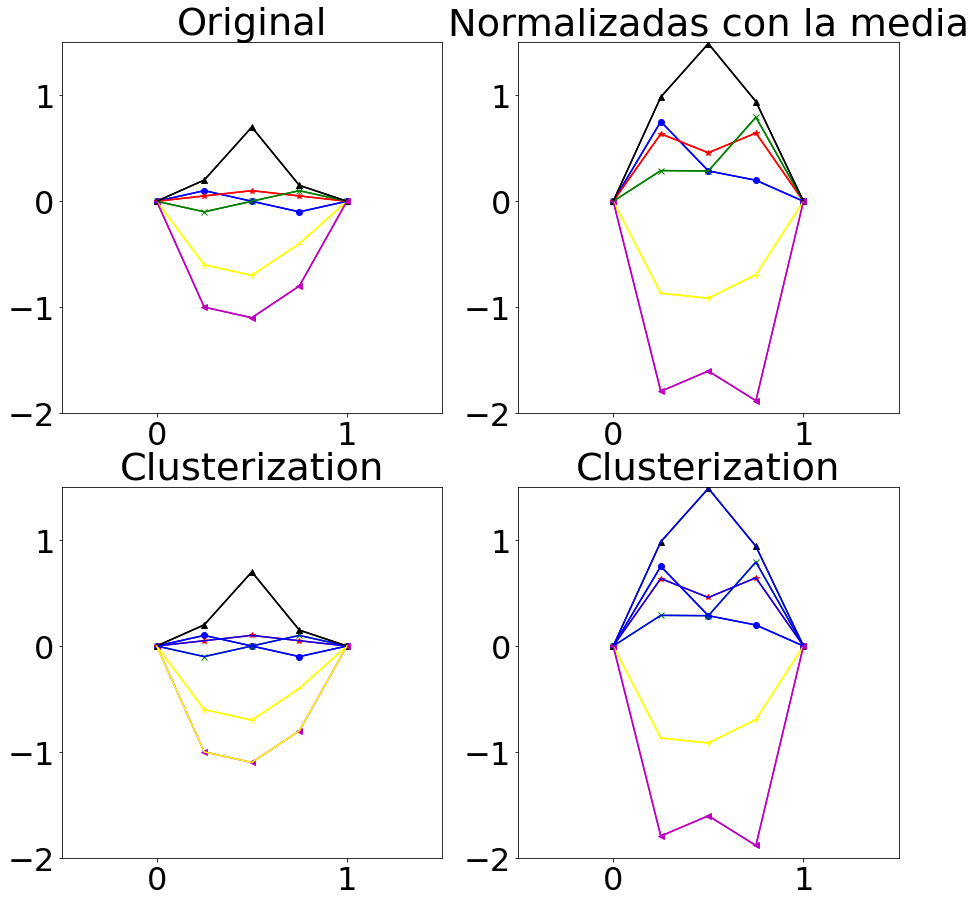

In [267]:
#@title
from sklearn.cluster import KMeans

cluster_number = 3
kmeans_model = KMeans(n_clusters = cluster_number)
kmeans_model2 = KMeans(n_clusters = cluster_number)
kmeans_model.fit(lista)
kmeans_model2.fit(norm_lista)
y_km=kmeans_model.labels_
y_km2=kmeans_model2.labels_
 
col=['yellow','blue','red','green','black','m']
col2=col
# procedimiento para pintar con el color correcto, según el cluster
for kk in range(len(y_km)):
  for k in range(len(col)):
    if y_km[k]==y_km[kk]:
      aux=col[kk]
      col2[k]=aux
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']
col3=col
for kk in range(len(y_km2)):
  for k in range(len(col)):
    if y_km2[k]==y_km2[kk]:
      aux=col[kk]
      col3[k]=aux
#print(col,col2,col3)
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']

# Pintamos las curvas
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

#fig.suptitle('Comparation with clusterization')
# Pintamos curvas originales
# La original
axs[0,0].plot(x, lista[0], '-+', color='yellow');
axs[0,0].plot(x, lista[1], '-o', color='blue');
axs[0,0].plot(x, lista[2], '-*', color='red');
axs[0,0].plot(x, lista[3], '-x', color='green');
axs[0,0].plot(x, lista[4], '-^', color='black');
axs[0,0].plot(x, lista[5], '-<', color='m');
axs[0,0].set_title('Original')
#axs[0,0].axis('equal')
for k in range(len(lista)):
  axs[0,0].plot(x,lista[k],color=col[k])
  axs[0,0].set_title('Original')
  #axs[0,0].axis('equal')
#plt.xlim([-0.5,1.5])
# Pintamos curvas normalizadas con la media
# scaled plot

axs[0,1].plot(x, norm_lista[0], '-+', color='yellow');
axs[0,1].plot(x, norm_lista[1], '-o', color='blue');
axs[0,1].plot(x, norm_lista[2], '-*', color='red');
axs[0,1].plot(x, norm_lista[3], '-x', color='green');
axs[0,1].plot(x, norm_lista[4], '-^', color='black');
axs[0,1].plot(x, norm_lista[5], '-<', color='m');
for k in range(len(lista)):
  axs[0,1].plot(x,norm_lista[k],color=col[k])
  axs[0,1].set_title('Normalizadas con la media')
  #axs[0,1].axis('equal')

# Pintamos la clusterización de las curvas originales
# La original
axs[1,0].plot(x, lista[0], '-+', color='yellow');
axs[1,0].plot(x, lista[1], '-o', color='blue');
axs[1,0].plot(x, lista[2], '-*', color='red');
axs[1,0].plot(x, lista[3], '-x', color='green');
axs[1,0].plot(x, lista[4], '-^', color='black');
axs[1,0].plot(x, lista[5], '-<', color='m');
axs[1,0].set_title('Original')
#axs[1,0].axis('equal')
for k in range(len(lista)):
  axs[1,0].plot(x,lista[k],color=col2[k])
  axs[1,0].set_title('Clusterization')
  #axs[1,0].axis('equal')
# Pintamos la clusterización de as curvas normalizadas con la media
axs[1,1].plot(x, norm_lista[0], '-+', color='yellow');
axs[1,1].plot(x, norm_lista[1], '-o', color='blue');
axs[1,1].plot(x, norm_lista[2], '-*', color='red');
axs[1,1].plot(x, norm_lista[3], '-x', color='green');
axs[1,1].plot(x, norm_lista[4], '-^', color='black');
axs[1,1].plot(x, norm_lista[5], '-<', color='m');
for k in range(len(lista)):
  axs[1,1].plot(x,norm_lista[k],color=col3[k])
  axs[1,1].set_title('Clusterization')
  #axs[1,1].axis('equal')
a1=axs[0,0];
a2=axs[0,1];
a3=axs[1,0];
a4=axs[1,1];
a1.set_xlim([-0.5,1.5])
a2.set_xlim([-0.5,1.5])
a3.set_xlim([-0.5,1.5])
a4.set_xlim([-0.5,1.5])
a1.set_ylim([-2,1.5])
a2.set_ylim([-2,1.5])
a3.set_ylim([-2,1.5])
a4.set_ylim([-2,1.5])

plt.savefig('/content/drive/MyDrive/Doctorado/comparacion_normalizacion_Mean.eps')



# Ahora comparamos las curvas y la clusterización respectiva usando la normalización MaxMin

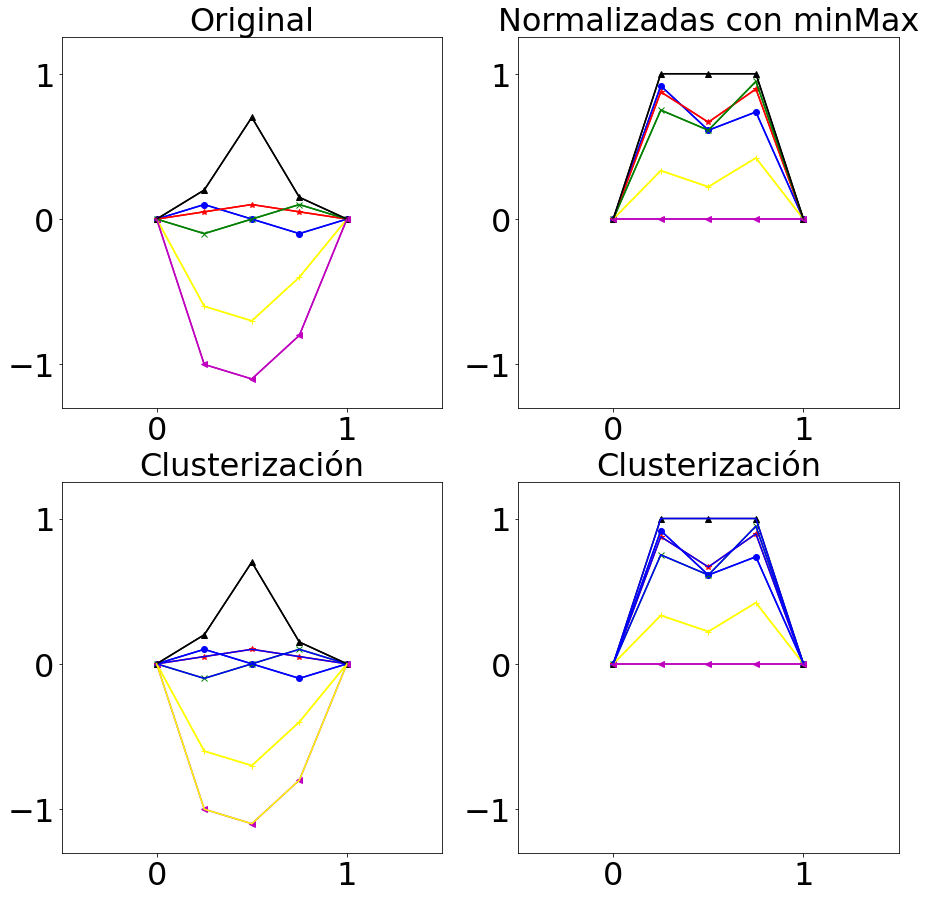

In [268]:
#@title
kmeans_model3 = KMeans(n_clusters = cluster_number)
kmeans_model3.fit(minMax_lista)
y_km3=kmeans_model3.labels_
col=['yellow','blue','red','green','black','m']
col4=col
# procedimiento para pintar con el color correcto, según el cluster
for kk in range(len(y_km)):
  for k in range(len(col)):
    if y_km3[k]==y_km3[kk]:
      aux=col[kk]
      col4[k]=aux
# No entiendo porque se me cambia col, me tocó escribirlo de nuevo
col=['yellow','blue','red','green','black','m']

# Pintamos las curvas

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)
#fig.suptitle('Comparación de clusterizaciones con normalización MaxMin',fontsize=36)
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)
# La original
axs[0,0].plot(x, lista[0], '-+', color='yellow');
axs[0,0].plot(x, lista[1], '-o', color='blue');
axs[0,0].plot(x, lista[2], '-*', color='red');
axs[0,0].plot(x, lista[3], '-x', color='green');
axs[0,0].plot(x, lista[4], '-^', color='black');
axs[0,0].plot(x, lista[5], '-<', color='m');
axs[0,0].set_title('Original',fontsize=32)
#axs[0,0].axis('equal')
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)

#ax.set_xticklabels([1,4,5], fontsize=12) 
# Curvas originales
for k in range(len(lista)):
  axs[0,0].plot(x,lista[k],color=col[k])
  axs[0,0].set_title('Original',fontsize=32)
  #axs[0,0].axis('equal')
# Curvas escaladas con minMax

axs[0,1].plot(x, minMax_lista[0], '-+', color='yellow');
axs[0,1].plot(x, minMax_lista[1], '-o', color='blue');
axs[0,1].plot(x, minMax_lista[2], '-*', color='red');
axs[0,1].plot(x, minMax_lista[3], '-x', color='green');
axs[0,1].plot(x, minMax_lista[4], '-^', color='black');
axs[0,1].plot(x, minMax_lista[5], '-<', color='m');
for k in range(len(lista)):
  axs[0,1].plot(x,minMax_lista[k],color=col[k])
  axs[0,1].set_title('Normalizadas con minMax',fontsize=32)
  #axs[0,1].axis('equal')
  

#plt.xticks(fontsize=30)
##plt.yticks(fontsize=30)
# Curvas originales clusterizadas

axs[1,0].plot(x, lista[0], '-+', color='yellow');
axs[1,0].plot(x, lista[1], '-o', color='blue');
axs[1,0].plot(x, lista[2], '-*', color='red');
axs[1,0].plot(x, lista[3], '-x', color='green');
axs[1,0].plot(x, lista[4], '-^', color='black');
axs[1,0].plot(x, lista[5], '-<', color='m');
axs[1,0].set_title('Original',fontsize=32)
#axs[1,0].axis('equal')
for k in range(len(lista)):
  axs[1,0].plot(x,lista[k],color=col2[k])
  axs[1,0].set_title('Clusterización',fontsize=32)
  #axs[1,0].axis('equal')
  #plt.xticks(fontsize=30)
  ##plt.yticks(fontsize=30)


# Curvas escaladas con MinMax clusterizadas
axs[1,1].plot(x, minMax_lista[0], '-+', color='yellow');
axs[1,1].plot(x, minMax_lista[1], '-o', color='blue');
axs[1,1].plot(x, minMax_lista[2], '-*', color='red');
axs[1,1].plot(x, minMax_lista[3], '-x', color='green');
axs[1,1].plot(x, minMax_lista[4], '-^', color='black');
axs[1,1].plot(x, minMax_lista[5], '-<', color='m');
for k in range(len(lista)):
  axs[1,1].plot(x,minMax_lista[k],color=col4[k])
  axs[1,1].set_title('Clusterización',fontsize=32)
  #axs[1,1].axis('equal')
  #plt.xticks(fontsize=30)
  #plt.yticks(fontsize=30)
  # set labels and font size
a1=axs[0,0];
a2=axs[0,1];
a3=axs[1,0];
a4=axs[1,1];
a1.set_xlim([-0.5,1.5])
a2.set_xlim([-0.5,1.5])
a3.set_xlim([-0.5,1.5])
a4.set_xlim([-0.5,1.5])
a1.set_ylim([-1.3,1.25])
a2.set_ylim([-1.3,1.25])
a3.set_ylim([-1.3,1.25])
a4.set_ylim([-1.3,1.25])

plt.savefig('/content/drive/MyDrive/Doctorado/comparacion_normalizacion_Mm.eps')


In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
